In [1]:
#Data retrieved from: https://www.kaggle.com/datasets/carrie1/ecommerce-data
#Cleaned data retrieved from file: 'E-Commerce Data (Examination & Cleaning).ipynb'

In [15]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Import csv file, save to variable 'data'
data = pd.read_csv('ecommerce_data_clean.csv')

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Descriptive Analysis

In [18]:
#View quantitative aggregate data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
#Changes 'CustomerID' column from a float to object data type
#This is because I would like to treat 'CustomerID' values as if they were names
#This allows us to better use methods such as 'top' or 'unique' to see the
    #customer who has the most orders and the number of unique customers
data['CustomerID'] = data.CustomerID.astype(object)

In [20]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [21]:
#View categorical aggregate data
data.describe(include=[object])

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,541909,541909,540455,541909,406829.0,541909
unique,25900,4070,4223,23260,4372.0,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,17841.0,United Kingdom
freq,1114,2313,2369,1114,7983.0,495478


In [22]:
data_quantity_date_time = data[['Quantity', 'InvoiceDate']].copy()

In [23]:
#data_quantity_date_time['InvoiceDate'] = data_quantity_date_time['InvoiceDate'].str.split(' ')
data_quantity_date_time

,Quantity,InvoiceDate
0,6,2010-12-01 08:26:00
1,6,2010-12-01 08:26:00
2,8,2010-12-01 08:26:00
3,6,2010-12-01 08:26:00
4,6,2010-12-01 08:26:00
...,...,...
541904,12,2011-12-09 12:50:00
541905,6,2011-12-09 12:50:00
541906,4,2011-12-09 12:50:00
541907,4,2011-12-09 12:50:00


In [32]:
data_quantity_date_time[['InvoiceDay', 'InvoiceTime']] = data_quantity_date_time['InvoiceDate'].str.split(expand=True)

In [35]:
data_quantity_date_time = data_quantity_date_time.drop('InvoiceDate', axis=1)

In [36]:
data_quantity_date_time

,Quantity,InvoiceDay,InvoiceTime
0,6,2010-12-01,08:26:00
1,6,2010-12-01,08:26:00
2,8,2010-12-01,08:26:00
3,6,2010-12-01,08:26:00
4,6,2010-12-01,08:26:00
...,...,...,...
541904,12,2011-12-09,12:50:00
541905,6,2011-12-09,12:50:00
541906,4,2011-12-09,12:50:00
541907,4,2011-12-09,12:50:00


In [ ]:
(data_quantity_date_time['Quantity'].min())

C:\Users\mitch\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='InvoiceDay', ylabel='InvoiceTime'>

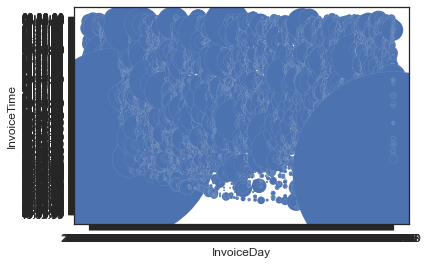

In [46]:
sns.scatterplot(data=data_quantity_date_time, x="InvoiceDay", y="InvoiceTime", size="Quantity", legend=False, sizes=((data_quantity_date_time['Quantity'].min() / 2), (data_quantity_date_time['Quantity'].max() / 2)))